# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [38]:
import os
import pandas as pd

root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Sample Answer to Exercise 1**

In [39]:
import pandas as pd
import numpy as np
df_target = pd.read_csv('Training_data_targets.csv')
df_train = pd.read_csv('Training_data.csv')


array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_O

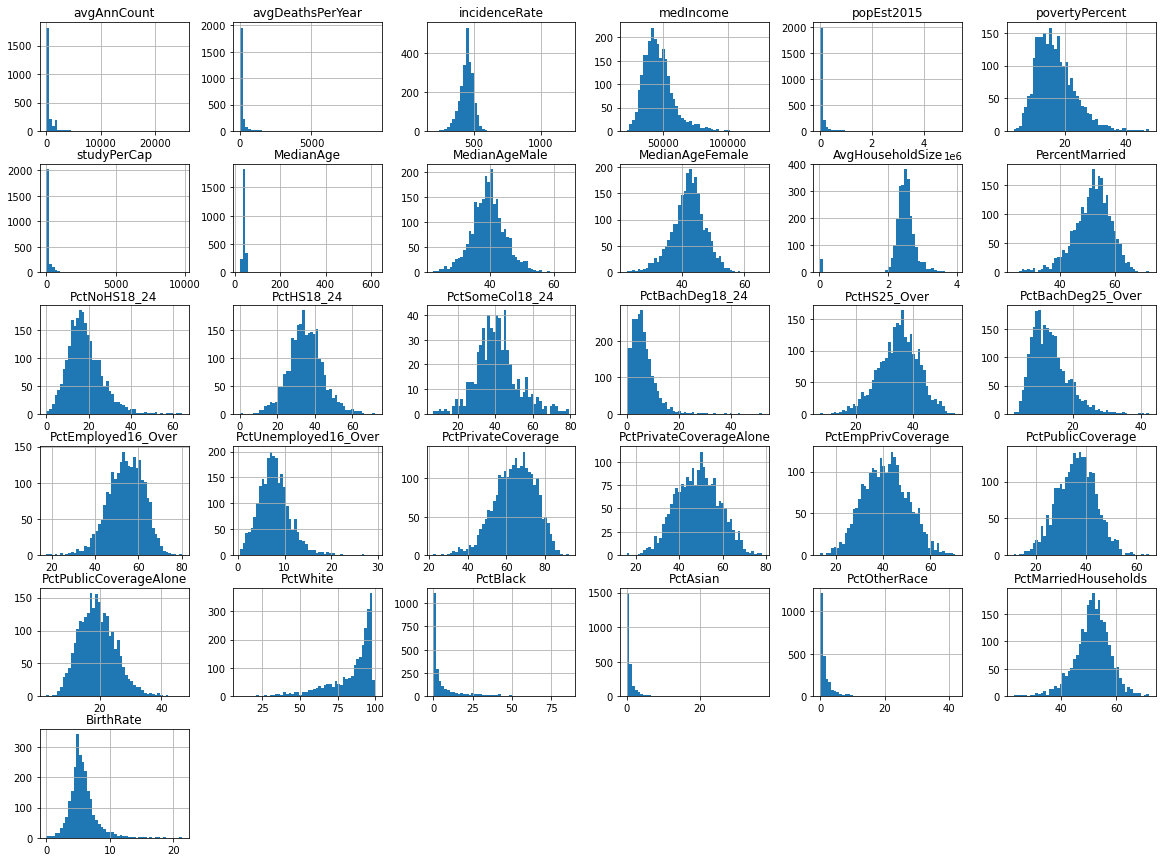

In [40]:
df_train.hist(bins=50,figsize=(20,15))


In [64]:
df_train.duplicated().sum()

0

In [89]:
merged_df = pd.concat([df_train, df_target], axis=1)
merged_df


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,59.000000,30,404.300000,33975,8251,20.5,0.000000,51.3,50.8,51.9,...,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436,199.5
1,114.000000,41,403.800000,47363,22702,13.8,0.000000,40.8,39.8,42.7,...,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661,137.1
2,33.000000,11,352.000000,77222,9899,6.8,0.000000,38.1,36.9,39.8,...,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130,126.9
3,254.000000,100,429.600000,80650,48904,7.5,0.000000,43.5,42.7,44.1,...,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462,173.8
4,75.000000,32,407.500000,42839,22255,14.6,0.000000,31.1,30.2,31.6,...,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469,179.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,...,42.4,42.6,23.4,95.398451,2.154399,0.448024,0.106749,49.736708,5.379260,201.5
2434,113.000000,37,497.300000,61259,17299,9.0,0.000000,45.9,44.9,47.3,...,43.6,34.8,19.9,92.609104,3.320038,0.786016,0.997184,53.404362,3.227666,160.0
2435,571.000000,210,457.200000,49790,118212,12.6,676.750245,35.4,34.5,36.3,...,56.5,28.6,13.7,91.484690,1.389174,4.463981,0.651015,47.707412,4.937288,160.0
2436,1962.667684,7,453.549422,50886,2640,10.4,0.000000,47.4,45.3,50.1,...,35.1,32.3,12.6,96.892139,0.987203,0.548446,0.146252,62.436975,8.951965,136.2


In [90]:
corr_matrix= merged_df.corr()

In [91]:
corr_matrix = merged_df.corr()
corr_matrix["TARGET_deathRate"].sort_values(ascending=False) 


TARGET_deathRate           1.000000
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
povertyPercent             0.413260
PctHS25_Over               0.409915
PctPublicCoverage          0.391899
PctUnemployed16_Over       0.362612
PctHS18_24                 0.266285
PctBlack                   0.236380
PctNoHS18_24               0.090565
MedianAgeFemale            0.008665
MedianAge                 -0.000039
studyPerCap               -0.024729
MedianAgeMale             -0.027263
AvgHouseholdSize          -0.045545
BirthRate                 -0.088543
avgDeathsPerYear          -0.094048
popEst2015                -0.130122
avgAnnCount               -0.150019
PctWhite                  -0.174521
PctAsian                  -0.181948
PctOtherRace              -0.182602
PctSomeCol18_24           -0.186140
PctEmpPrivCoverage        -0.259006
PercentMarried            -0.266153
PctBachDeg18_24           -0.284566
PctMarriedHouseholds      -0.290645
PctPrivateCoverageAlone   -0

Based on the correlation values provided, the top five features with the strongest positive correlations to the target variable (TARGET_deathRate) are:

1)incidenceRate: 0.443983

2)PctPublicCoverageAlone: 0.439734

3)povertyPercent: 0.413260

4)PctHS25_Over: 0.409915

5)PctPublicCoverage: 0.391899


array([[<AxesSubplot:xlabel='avgAnnCount', ylabel='avgAnnCount'>,
        <AxesSubplot:xlabel='avgDeathsPerYear', ylabel='avgAnnCount'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='avgAnnCount'>,
        <AxesSubplot:xlabel='medIncome', ylabel='avgAnnCount'>,
        <AxesSubplot:xlabel='popEst2015', ylabel='avgAnnCount'>],
       [<AxesSubplot:xlabel='avgAnnCount', ylabel='avgDeathsPerYear'>,
        <AxesSubplot:xlabel='avgDeathsPerYear', ylabel='avgDeathsPerYear'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='avgDeathsPerYear'>,
        <AxesSubplot:xlabel='medIncome', ylabel='avgDeathsPerYear'>,
        <AxesSubplot:xlabel='popEst2015', ylabel='avgDeathsPerYear'>],
       [<AxesSubplot:xlabel='avgAnnCount', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='avgDeathsPerYear', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='medIncome', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel=

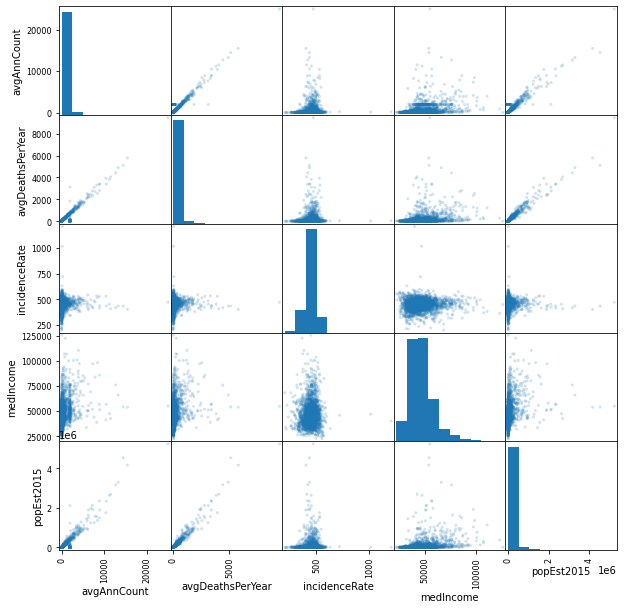

In [92]:
top_five = df_train[corr_matrix.index[:5]]
pd.plotting.scatter_matrix(top_five, alpha=0.2, figsize=(10,10))


In [93]:
merged_df.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
TARGET_d

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Sample Answer to Exercise 2**

In [94]:
numeric_features= list(merged_df)

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [96]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")

In [97]:
idxs = range(len(merged_df.columns))
print(idxs)
names = list(merged_df.iloc[:, idxs].columns)
print(names)

range(0, 32)
['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'TARGET_deathRate']


In [98]:


num_pipeline= Pipeline([
    
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
]) 

num_pipeline.fit(merged_df)

full_pipeline= num_pipeline.transform(merged_df)

full_pipeline_df = pd.DataFrame(full_pipeline, columns= merged_df.columns)

print("Data before processing\n", merged_df)
print("\n Processed data:\n", full_pipeline_df)
    

Data before processing
       avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0       59.000000                30     404.300000      33975        8251   
1      114.000000                41     403.800000      47363       22702   
2       33.000000                11     352.000000      77222        9899   
3      254.000000               100     429.600000      80650       48904   
4       75.000000                32     407.500000      42839       22255   
...           ...               ...            ...        ...         ...   
2433   335.000000               155     445.700000      41608       61109   
2434   113.000000                37     497.300000      61259       17299   
2435   571.000000               210     457.200000      49790      118212   
2436  1962.667684                 7     453.549422      50886        2640   
2437   741.000000               308     478.400000      45556      119980   

      povertyPercent  studyPerCap  MedianAge  Media

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# **Sample Answer to Exercise 3**

In [99]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(full_pipeline_df, df_target , test_size=0.3, random_state=42)


In [100]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
ols_model_pred=ols_model.predict(X_test)
ols_model_meansq = mean_squared_error(y_test, ols_model_pred)
print("OLS mean squared error", {ols_model_meansq})

OLS mean squared error {2.6333297802262935e-27}


In [101]:
Lasso= Lasso(alpha=0.01)
Lasso.fit(X_train, y_train)
Lasso_predicted= Lasso.predict(X_test)
Lasso_meansq= mean_squared_error(y_test, Lasso_predicted)
print("Lasso mean squared error", Lasso_meansq)

Lasso mean squared error 9.805022472654323e-05


In [102]:
ridge = Ridge(alpha =10)
ridge.fit(X_train,y_train)
ridge_predicted=ridge.predict(X_test)
ridge_meansq= mean_squared_error(y_test, ridge_predicted)
print("Ridge mean squared error", ridge_meansq) 

Ridge mean squared error 0.05221833153613603


In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np
alphas = np.logspace(-4,-4,9)

#setting up the parameter grid for ridge and lasso models
Lasso_param_grid= {'alpha': alphas}
ridge_param_grid= {'alpha': alphas}

Lasso_CV = GridSearchCV(Lasso(), Lasso_param_grid, cv=5)
Lasso_CV.fit(X_train, y_train)

ridge_CV = GridSearchCV(Ridge(), ridge_param_grid, cv=5)
ridge_CV.fit(X_train, y_train)
print(f"Best performing lasso, {Lasso_CV.best_params_}")
print(f"Best performing ridge, {ridge_CV.best_params_}")


Best performing lasso, {'alpha': 0.0001}
Best performing ridge, {'alpha': 0.0001}


# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [104]:
from sklearn.linear_model import Lasso

# Best regularization weight identified from previous step
best_alpha = Lasso_CV.best_params_['alpha']

# Fit Lasso model with best alpha on training data
Lasso_model = Lasso(alpha=best_alpha)
Lasso_model.fit(X_train, y_train)

# Get coefficients of the fitted Lasso model
coefficients = np.abs(Lasso_model.coef_)

# Sort coefficients in descending order
sorted_coefficients = np.argsort(-coefficients)

# Get the top five features
top_five_features = sorted_coefficients[:5]

# Get feature names
feature_names = X_train.columns

# Report top five features in descending order of importance
print("Top five features in descending order of importance:")
for feature in top_five_features:
    print(feature_names[feature])


Top five features in descending order of importance:
TARGET_deathRate
avgDeathsPerYear
medIncome
avgAnnCount
PctPublicCoverageAlone


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Sample Answers for Exercise 5**

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define RandomForestRegressor object and set hyperparameters
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)


In [106]:
# Fit RandomForestRegressor object to training data
rf.fit(X_train, y_train)

# Make predictions on test data using fitted RandomForestRegressor object
rf_predicted = rf.predict(X_test)

# Evaluate performance of RandomForestRegressor object using mean squared error 
mse = mean_squared_error(y_test, rf_predicted)
print(f"Random forest mean squared error: {mse}")

/var/folders/19/5whly3kd1rl0b6pghjjzlnr80000gn/T/ipykernel_25300/4226857770.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random forest mean squared error: 14.07038982515554


In [107]:
Lasso= Lasso(alpha=0.01)
Lasso.fit(X_train, y_train)
Lasso_predicted= Lasso.predict(X_test)
Lasso_meansq= mean_squared_error(y_test, Lasso_predicted)
print("Lasso mean squared error", Lasso_meansq)

if mse< Lasso_meansq:
    print("random forest provides the best fit")
else:
    print("Lasso provides the best fit")

Lasso mean squared error 9.805022472654323e-05
Lasso provides the best fit


In [108]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:5]
feature_names = X_train.columns

#Identifying the top 5 features using Random forest classifier
print("\nTop 5 Most Important/Relevant Features Identified Using Random Forest Regression Model:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.3f}")


Top 5 Most Important/Relevant Features Identified Using Random Forest Regression Model:
TARGET_deathRate: 0.998
PctAsian: 0.000
PctHS25_Over: 0.000
PctPublicCoverage: 0.000
PctPublicCoverageAlone: 0.000


The Random Forest regression model identified only one feature as important, which is TARGET_deathRate, while the Lasso regression model identified all features as important to some extent. This suggests that the Random Forest model has a preference for identifying a single feature that is highly predictive, while the Lasso model considers all features to be potentially relevant.



# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [109]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions


# **Sample Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



In [110]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [111]:
merged_df2 = pd.concat([test_data, test_targets], axis=1)
merged_df2

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,173.000000,80,409.900000,44076,36223,20.3,0.000000,39.2,38.0,40.0,...,34.5,35.0,19.9,84.954412,6.834058,0.709777,5.271427,56.565961,7.914411,181.2
1,777.000000,291,475.200000,49061,150346,12.9,525.454618,39.4,37.6,41.3,...,41.5,31.6,14.9,94.374888,0.364712,0.878342,0.375053,54.146506,7.001795,173.4
2,38150.000000,14010,405.500000,55686,10170292,18.7,255.941521,35.6,34.4,36.8,...,39.7,32.9,23.0,53.258710,8.276140,14.129380,19.591522,44.581650,4.705281,148.4
3,102.000000,51,442.500000,34916,16779,23.0,59.598307,41.1,38.9,42.9,...,30.9,47.1,27.7,97.298726,0.898467,0.076340,0.035234,47.864397,5.841924,213.5
4,108.000000,41,364.100000,72510,41764,9.8,0.000000,33.3,32.2,34.1,...,51.6,19.3,10.8,71.433130,14.257664,5.242618,4.440027,56.913054,6.934168,155.2
5,187.000000,80,521.200000,40766,28487,20.6,0.000000,43.1,41.6,44.6,...,42.5,38.5,20.9,93.538472,1.519113,0.374479,0.162510,52.138829,2.198163,220.2
6,95.000000,37,444.500000,52273,14915,9.9,0.000000,43.5,41.7,45.1,...,53.3,31.3,13.0,98.236002,0.394227,0.467727,0.000000,60.318995,4.203691,156.6
7,98.000000,34,461.200000,50370,17094,11.6,234.000234,38.0,37.4,38.9,...,40.6,36.4,18.3,91.525620,1.211454,0.313007,3.570601,56.553895,8.150028,148.6
8,193.000000,73,468.200000,48718,31330,15.9,31.918289,43.3,42.7,44.2,...,48.0,38.4,18.6,95.979695,1.416351,0.764579,0.394823,49.625272,3.499365,172.8
9,113.000000,47,408.900000,31176,22881,32.5,0.000000,38.4,35.6,40.3,...,30.5,44.5,29.3,53.890366,43.162906,1.162392,0.403191,45.871348,5.115327,164.9


In [112]:

num_pipeline= Pipeline([
    
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
]) 

#lets fit the pipeline on the training data
num_pipeline.fit(X_train)

#dataframe from the processed data
merged_df2=pd.DataFrame(num_pipeline.transform(merged_df2), columns=merged_df2.columns)

# Instantiate Random Forest regression model with best hyperparameters 
rf=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
#Now train the model on the training set
rf.fit(X_train, y_train)

X_test2=num_pipeline.transform(merged_df2)
rf_predicted2=rf.predict(X_test2)
# Evaluate predictions using mean squared error
rf_mse2 = mean_squared_error(test_targets, rf_predicted2)
print("random forest regression mean squared error", rf_mse2)

ridge=Ridge(alpha=0.01)
ridge.fit(num_pipeline.transform(X_train), y_train)
y_pred_ridge=ridge.predict(num_pipeline.transform(merged_df2))
ridge_mse2= mean_squared_error(test_targets, y_pred_ridge)
print("ridge regression mean squared error", ridge_mse2)



/var/folders/19/5whly3kd1rl0b6pghjjzlnr80000gn/T/ipykernel_25300/777146027.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


random forest regression mean squared error 8765.245974784562
ridge regression mean squared error 24363319.693155695


/Users/karthikuni/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

In [113]:
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'


In [114]:
import matplotlib.pyplot as plt

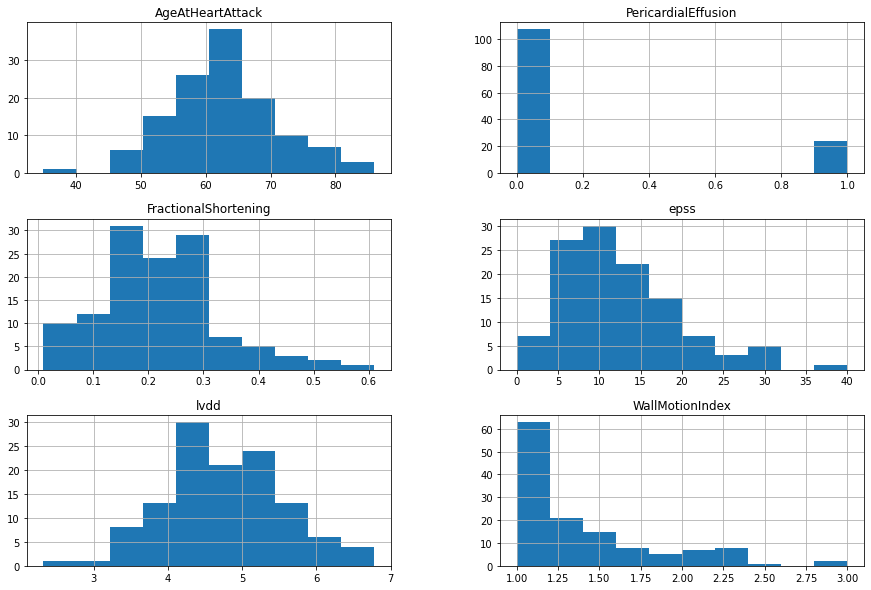

In [115]:
# Read in the dataset
datafeatures = pd.read_csv(data_features_path)
datatargets= pd.read_csv(data_targets_path)

# Plot histograms of all features
datafeatures.hist(figsize=(15, 10))
plt.show()



In [116]:
# Identify potential outliers

for col in datafeatures.columns :
    q1 = datafeatures[col].quantile(0.25)
    q3 = datafeatures[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = datafeatures[(datafeatures[col] < lower) | (datafeatures[col] > upper)]
    if not outliers.empty:
        print(f"Potential outliers in column {col}:")
        print(outliers)
        

Potential outliers in column AgeAtHeartAttack:
    AgeAtHeartAttack  PericardialEffusion  FractionalShortening  epss  lvdd  \
21              85.0                    1                 0.180  19.0  5.46   
26              35.0                    0                 0.300   5.0  4.17   
69              86.0                    0                 0.225  12.2  5.20   

    WallMotionIndex  
21             1.38  
26             1.00  
69             2.18  
Potential outliers in column PericardialEffusion:
     AgeAtHeartAttack  PericardialEffusion  FractionalShortening    epss  \
11             62.000                    1                  0.45   9.000   
15             55.000                    1                  0.25  12.063   
16             69.000                    1                  0.26  11.000   
17             62.529                    1                  0.07  20.000   
19             66.000                    1                  0.22  15.000   
21             85.000                    1

Based on the histogram and the identified outliers, it seems that there are potential outliers in all three columns: "AgeAtHeartAttack", "PericardialEffusion", and "FractionalShortening".

For "AgeAtHeartAttack", there are three potential outliers at age 35, 85, and 86. These ages are far from the majority of the ages, which are between 40 and 70, and are more than 1.5 times the interquartile range away from the first and third quartiles.

For "PericardialEffusion", there are many potential outliers with a value of 1. The majority of the values are 0, and the 1 values are more than 1.5 times the interquartile range away from the first and third quartiles. Therefore, they are considered potential outliers.

For "FractionalShortening", there are three potential outliers with values of 0.04, 0.61, and 0.51. These values are far from the majority of the values, which are between 0.1 and 0.3, and are more than 1.5 times the interquartile range away from the first and third quartiles

# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

In [117]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


#defining the pipeline
num_pipeline= Pipeline([
    
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
]) 
#fit the pipeline
num_pipeline.fit(datafeatures)
# transform the data using the fitted pipeline
datafeatures_transformed= num_pipeline.transform(datafeatures)
print(num_pipeline)



Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])


# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

In [118]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(datafeatures, datatargets, test_size=0.2, random_state=42)

# define pipelines for logistic regression with L1 and L2 regularization
num_pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
])

num_pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty='l2', solver='liblinear',random_state=42))
])

# fit the pipelines to the training data
num_pipeline1.fit(X_train, y_train)
num_pipeline2.fit(X_train, y_train)

# evaluate the pipelines on the test data
logreg_l1 = num_pipeline1.predict(X_test)
logreg_l2 = num_pipeline2.predict(X_test)

# print evaluation metrics for first pipeline
print("Logistic Regression with L1 regularization:")
print("Accuracy:", accuracy_score(y_test, logreg_l1))
print("Precision:", precision_score(y_test, logreg_l1))
print("Recall:", recall_score(y_test, logreg_l1))
print("F1 score:", f1_score(y_test, logreg_l1))
# print evaluation metrics for second pipeline
print("\nLogistic Regression with L2 regularization:")
print("Accuracy:", accuracy_score(y_test,logreg_l2))
print("Precision:", precision_score(y_test, logreg_l2))
print("Recall:", recall_score(y_test, logreg_l2))
print("F1 score:", f1_score(y_test, logreg_l2))


Logistic Regression with L1 regularization:
Accuracy: 0.7777777777777778
Precision: 0.5714285714285714
Recall: 0.5714285714285714
F1 score: 0.5714285714285714

Logistic Regression with L2 regularization:
Accuracy: 0.7037037037037037
Precision: 0.42857142857142855
Recall: 0.42857142857142855
F1 score: 0.42857142857142855


/Users/karthikuni/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikuni/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best performing classifier is the logistic regression model with L1 regularization based on the evaluation metrics. It achieved a higher accuracy score of 0.778 compared to the L2 regularization model which only had an accuracy score of 0.704. Additionally, the L1 model also had a higher precision, recall, and F1 score.

L1 regularization adds a penalty term proportional to the absolute value of the weights of the model to the loss function. This has the effect of driving some of the weights to zero, which can help in feature selection by discarding less important features.

L2 regularization adds a penalty term proportional to the square of the weights of the model to the loss function. This has the effect of shrinking the weights towards zero, but generally does not result in any of the weights becoming exactly zero.
